<a href="https://colab.research.google.com/github/Sompote/transformer_pile/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Genrative AI to produce load defoormatin curve of pile in Bangkok sub Soil <br>
by Dr. Sompote Youwai November 2023 <br>
King Mongkut's University of Technology Thonburi

In [1]:
!pip install tensorflow -q

In [2]:
#Transformer prediciton to predict RIC combind model by Dr. Sompote Youwai 2023
import numpy as np
import pandas as pd

# Import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

#import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, Flatten, concatenate,Reshape, Dropout,Bidirectional,LayerNormalization
from keras import *
from keras.optimizers import Adam
import pickle #download weight scaler
#import keras_nlp


df = pd.read_excel('data_pile.xlsx',sheet_name='soil')
df_y = pd.read_excel('data_pile.xlsx',sheet_name='pile')
df_p = pd.read_excel('data_pile.xlsx',sheet_name='pile_length')
sc_f = pickle.load(open('scaler_f.pkl', 'rb'))

data=np.array(df)
data_y=np.array(df_y)
data_pile=np.array(df_p)
data_pile=data_pile[:,1:61]

x_feature=data_y[:,0:4]

bh=data[:,1:61]
bh2=data[:,61:122]/2



#scale data
X_train=bh


X_feature=x_feature

x_train=X_train/50
x_feature=sc_f.transform(X_feature)

soil_data=np.stack([x_train,bh2,data_pile],axis=2)

X=soil_data

#select sample
sample=1 #pile number that want to predict
Xd=X[sample-1:sample]
n=sample-1
X=Xd
feature=np.array([42,1,3,2]) #pile feature
feature=np.reshape(feature,(1,-1))

fd=sc_f.transform(feature)
x_feature=fd
X_train_CNN=np.zeros((X.shape[0],X.shape[1],X_feature.shape[1]+3))


#preparing input matrix
#first dim is time step, 2-4 is feature
X_train_CNN=np.zeros((X.shape[0],X.shape[1],X_feature.shape[1]+3))
X_train_CNN[:,:,0:3]=X
for i in range(0,(X.shape[0])):
  X_train_CNN[i,:,3]=x_feature[i,1]
  X_train_CNN[i,:,4]=x_feature[i,2]
  X_train_CNN[i,:,5]=x_feature[i,3]
  X_train_CNN[i,:,6]=x_feature[i,3]

XT=X_train_CNN

y_ini=np.zeros((1,40))
y_ini[0,0]=0


Load model

In [3]:
transformer = models.load_model('transformer_pile.h5')

Prediction

In [4]:
#prediciton of the specify number of pile

for step in range(0,39):
  y=transformer.predict([XT,y_ini,fd])
  y_ini[0,step+1]=y

#y_pred=sc_y.inverse_transform(y_ini)
y_pred=y_ini*40000

1/1 [==============================] - 0s 55ms/step


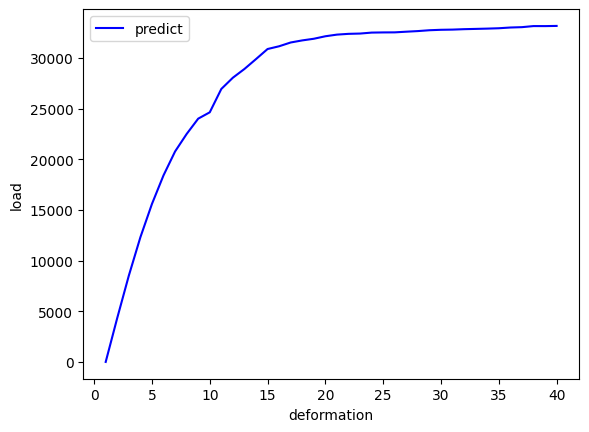

In [5]:
# Define the x-axis and corresponding y-axis values as lists

ydist=range(1,41)


plt.plot( ydist,y_pred[0],color='blue',label='predict')
plt.legend()

plt.xlabel("deformation")
plt.ylabel("load")

ax = plt.gca()

plt.show()